# 1. Selección de dataset

Se realizó una búsqueda en varios de los sitios recomendados en clase con el fin de encontrar un dataset con una dificultad adecuada para la tarea (nivel intermedio). Dentro los sitios principales donde se realizaron las busquedas se encuentran:
    * Kaggle Datasets
    * UCI Machine Learning Repository
    * Microsoft Datasets

Al final se terminó seleccionando un dataset del repositorio UCI el cual se encontra en el siguiente enlace:
    * https://archive.ics.uci.edu/ml/datasets/Student+Performance

Dicho dataset contiene la información del desempeño académico de estudiantes de secundaria en dos escuelas portuguesas, cuenta con 649 instancias y 33 atributos. Dicho dataset cuenta con resultados tanto para la materia de matemática como para la de portugues. En este caso realizaremos el pre-procesado de los resultados de matemática.

# 2. Configuración Inicial

Primero importamos las bibliotecas necesarios para nuestro pre-procesado en este caso tenemos:
* Numpy
* Pandas
* Matplotlib
* sklearn

In [1]:
import pandas as pd
import numpy as nu
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

Posteriormente leemos el dataset que fue seleccionado con anterioridad, el mismo se encuentra en un archivo csv. El archivo csv viene separado por ';' razón por la cual es necesario especificar el tipo de caracter separador cuando se llame al API read_csv  de la biblioteca pandas.

In [2]:
students_grades = pd.read_csv("C:\datasets\student-mat.csv", sep=';')

Imprimimos los datos que leimos del archivo csv, con el fin de asegurarnos que se hayan leido de manera correcta.

In [3]:
print(students_grades)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

# 3. Pre-procesado

## 3.1. Atributos

Ciertos atributos del conjunto de datos serán removidos dado que no aportan ningún valor, entre ellos estan:
* 'reason': Que corresponde a la razón por la que escogieron la escuela, esto porque el analisis se enfoca más en las razones sociales, familiares, y economicas del exito escoloar.
* 'G1' y 'G2' : Que corresponde a los resultados del primer y segundo periodo lectivo, respectivamente, esto porque nos enfocaremos mas en el resultado final ('G3') si paso la materia o no. En este caso la materia es matematicas.

In [4]:
students_grades.drop(['reason'], axis=1, inplace=True)
students_grades.drop([  'G1'  ], axis=1, inplace=True)
students_grades.drop([  'G2'  ], axis=1, inplace=True)

### 3.1.1. School

El conjunto de datos cuenta con un atributo llamado school, donde "GP" significa que el estudiante pertenece a la escuela
Gabriel Pereira, mientras que "MS" significa que pertenece a la escuela Mousinho da Silveira.
Al ser strings son datos que no pueden ser manipulados y visualizados de manera sencilla por lo que seran transformados a valores numericos, en este caso se selecciono un formato binario. En donde:

* 0 : Gabriel Pereira.
* 1 : Mousinho da Silveira.

In [5]:
students_grades.school.replace(to_replace = 'GP' , value = 0, inplace=True)
students_grades.school.replace(to_replace = 'MS' , value = 1, inplace=True)

Luego se realiza un simple gráfico de barras con el fin de determinar visualmente si los datos para este atributo se encuentran balanceados.

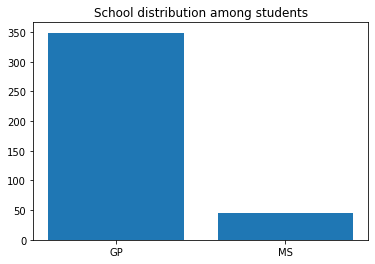

In [6]:
x_school = ['GP','MS']
y_school =  students_grades[['school','G3']].groupby('school').count()
y_school.columns = ['count']
plt.bar(x_school, y_school['count'])
plt.title('School distribution among students')
plt.show()

En el grafico anterior es posible observar que el atributo de school se encuentra balanceado.

### 3.1.2. Sex

El atributo sex al igual que school viene en forma de string, por lo que debe ser transformado a valores númericos con el fin de poder procesar dicha información y visualizarla. Igualmente se seleccionó un formato binario donde:

* 0 : Masculino.
* 1 : Femenino.

In [7]:
students_grades.sex.replace(to_replace = "M", value = 0, inplace=True)
students_grades.sex.replace(to_replace = "F", value = 1, inplace=True)

Luego se realiza un simple gráfico de barras con el fin de determinar visualmente si los datos para este atributo se encuentran balanceados.

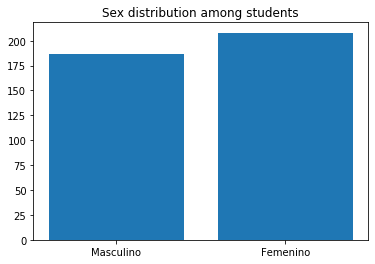

In [8]:
x_sex = ['Masculino','Femenino']
y_sex =  students_grades[['sex','G3']].groupby('sex').count()
y_sex.columns = ['count']
plt.bar(x_sex, y_sex['count'])
plt.title('Sex distribution among students')
plt.show()

En el grafico anterior es posible observar que el atributo de sex se encuentra balanceado.

### 3.1.3. Age
El atributo age corresponde a la edad del estudiante la cual viene un formato númerico razón por la cual no hay que realizar ningún tipo de procesado en ella. Unicamente se revisará que los datos de este atributo se encuetren balanceados, utilizando para ello un gráfico de barras.

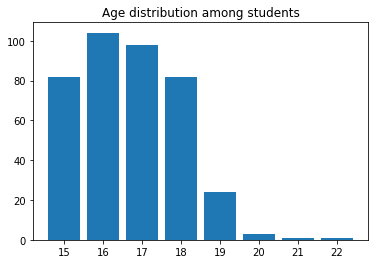

In [9]:
y_age = students_grades[['age','G3']].groupby('age').count()
y_age.columns = ['count']
plt.bar(y_age.index, y_age['count'])
plt.title('Age distribution among students')
plt.show()

Podemos observar que los datos se encuentran balanceados a pesar de que hay pocos estudiantes con edades iguales o superiores a 20.

### 3.1.4. Address
El atributo address en este caso corresponde a un dato del tipo string y que determina a si el estudiante viene de una zona rural o urbana. Al igual que en los otros casos se decidio transformarlo a un formato binario donde:

* 0 : Zona Urbana.
* 1 : Zona Rural.

In [10]:
students_grades.address.replace(to_replace = "U", value = 0, inplace=True)
students_grades.address.replace(to_replace = "R", value = 1, inplace=True)

Igualmente se realizá un gráfico de barras con el fin de determinar que los datos se encuentren balanceados para este atributo.

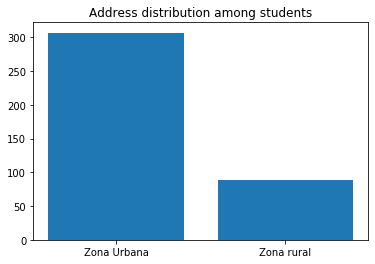

In [11]:
x_address = ['Zona Urbana','Zona rural']
y_address =  students_grades[['address','G3']].groupby('address').count()
y_address.columns = ['count']
plt.bar(x_address, y_address['count'])
plt.title('Address distribution among students')
plt.show()

En el grafico anterior es posible observar que el atributo de address se encuentra balanceado.

### 3.1.5. Familiy Size

El atributo famsize corresponde a un string donde "LE3" indica que la familia esta conformada por 3 miembros o menos y "GT3" cuando la familia consta de más de 3 miembros. Este atributo será transformado a un formato binario donde:

* 0 : Familia compuesta por 3 miembros o menos (LE3).
* 1 : Familia compuesta por más de 3 miembros (GT3).

In [12]:
students_grades.famsize.replace(to_replace = "LE3", value = 0, inplace=True)
students_grades.famsize.replace(to_replace = "GT3", value = 1, inplace=True)

Se realizá un gráfico de barras con el fin de determinar que los datos se encuentren balanceados para este atributo.

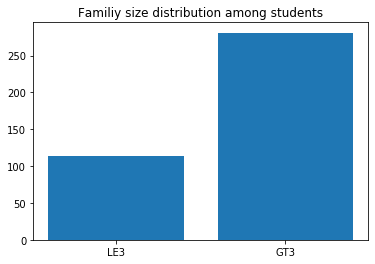

In [13]:
x_famsize = ['LE3','GT3']
y_famsize =  students_grades[['famsize','G3']].groupby('famsize').count()
y_famsize.columns = ['count']
plt.bar(x_famsize, y_famsize['count'])
plt.title('Familiy size distribution among students')
plt.show()

En el gráfico anterior es posible observar que el atributo de famsize se encuentra balanceado.

### 3.1.6. Parent's Cohabitation Status

Este atributo esta implementando a traves de un string done "T" significa que ambos padres viven juntos, mientras que "A" significa que viven aparte, es decir, se encuentran separados. Razón por  la cual este atributo será transformado a un formato binario done:

* 0 : Los padres viven juntos (T).
* 1 : Los padres estan separados (A).

In [14]:
students_grades.Pstatus.replace(to_replace = "T", value = 0, inplace=True)
students_grades.Pstatus.replace(to_replace = "A", value = 1, inplace=True)

Se realizá un gráfico de barras con el fin de determinar que los datos se encuentren balanceados para este atributo.

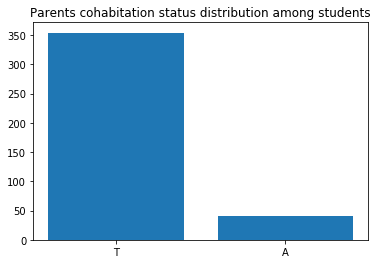

In [15]:
x_pstatus = ['T','A']
y_pstatus =  students_grades[['Pstatus','G3']].groupby('Pstatus').count()
y_pstatus.columns = ['count']
plt.bar(x_pstatus, y_pstatus['count'])
plt.title('Parents cohabitation status distribution among students')
plt.show()

### 3.1.7. Mother's Education

Este atributo indica el nivel educativo de la madre, en donde:
    * 0 - Inidica ningún tipo de educación
    * 1 - Educación Primaria (1er grado hasta 4to grado)
    * 2 - Educación Primaria (5to grado hasta 9no grado)
    * 3 - Educación Secundaria
    * 4 - Educación Universitaria
Al estar en formato numerico no es necesario transformar dicho atributo.
Pero si se realizá un gráfico de barras para determinar que los datos se encuentran balanceados.

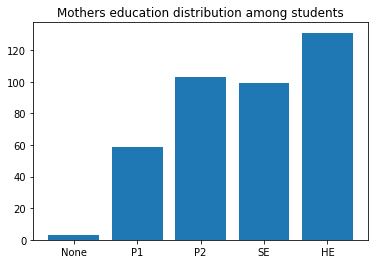

In [16]:
x_medu = ['None','P1', 'P2', 'SE','HE']
y_medu =  students_grades[['Medu','G3']].groupby('Medu').count()
y_medu.columns = ['count']
plt.bar(x_medu, y_medu['count'])
plt.title('Mothers education distribution among students')
plt.show()

En el gráfico anterior es posible observar que los datos se encuetran balanceados.

### 3.1.8. Father's Education

Este atributo indica el nivel educativo del padre, en donde:
    * 0 - Inidica ningún tipo de educación
    * 1 - Educación Primaria (1er grado hasta 4to grado)
    * 2 - Educación Primaria (5to grado hasta 9no grado)
    * 3 - Educación Secundaria
    * 4 - Educación Universitaria
Al estar en formato numerico no es necesario transformar dicho atributo.
Pero si se realizá un gráfico de barras para determinar que los datos se encuentran balanceados.

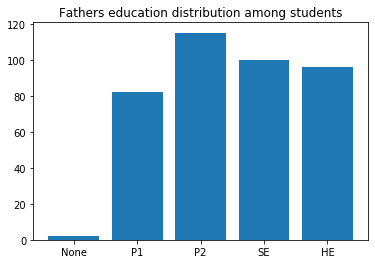

In [17]:
x_fedu = ['None','P1', 'P2', 'SE','HE']
y_fedu =  students_grades[['Fedu','G3']].groupby('Fedu').count()
y_fedu.columns = ['count']
plt.bar(x_fedu, y_fedu['count'])
plt.title('Fathers education distribution among students')
plt.show()

En el gráfico anterior es posible observar que los datos se encuetran balanceados.

### 3.1.9. Mother's job

Este atributo indica el tipo de trabajo de la madre. Las posibles opciones son: teacher, health, services, at_home, other. Al ser este tipo de atributo un string seran transformados a valores numericos donde:
    * 0 - "at_home"
    * 1 - "teacher"
    * 2 - "services"
    * 3 - "health"
    * 4 - "other"

In [18]:
students_grades.Mjob.replace(to_replace = "at_home" , value = 0, inplace=True)
students_grades.Mjob.replace(to_replace = "teacher" , value = 1, inplace=True)
students_grades.Mjob.replace(to_replace = "services", value = 2, inplace=True)
students_grades.Mjob.replace(to_replace = "health"  , value = 3, inplace=True)
students_grades.Mjob.replace(to_replace = "other"   , value = 4, inplace=True)

Ademas, se realizá un gráfico de barras para determinar que los datos se encuentran balanceados.

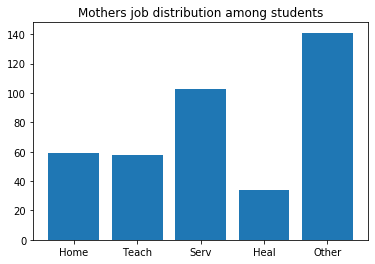

In [19]:
x_mjob = ['Home','Teach', 'Serv', 'Heal','Other']
y_mjob =  students_grades[['Mjob','G3']].groupby('Mjob').count()
y_mjob.columns = ['count']
plt.bar(x_mjob, y_mjob['count'])
plt.title('Mothers job distribution among students')
plt.show()

En el gráfico anterior es posible observar que los datos se encuetran balanceados.

### 3.1.10. Father's job

Este atributo indica el tipo de trabajo del padre. Las posibles opciones son: teacher, health, services, at_home, other. Al ser este tipo de atributo un string serán transformados a valores númericos donde:
    * 0 - "at_home"
    * 1 - "teacher"
    * 2 - "services"
    * 3 - "health"
    * 4 - "other"

In [20]:
students_grades.Fjob.replace(to_replace = "at_home" , value = 0, inplace=True)
students_grades.Fjob.replace(to_replace = "teacher" , value = 1, inplace=True)
students_grades.Fjob.replace(to_replace = "services", value = 2, inplace=True)
students_grades.Fjob.replace(to_replace = "health"  , value = 3, inplace=True)
students_grades.Fjob.replace(to_replace = "other"   , value = 4, inplace=True)

Ademas, se realizá un gráfico de barras para determinar que los datos se encuentran balanceados.

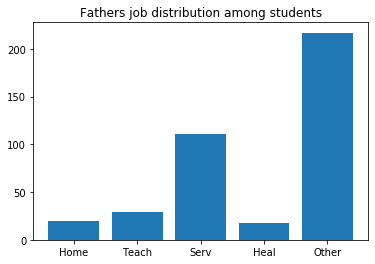

In [21]:
x_fjob = ['Home','Teach', 'Serv', 'Heal','Other']
y_fjob =  students_grades[['Fjob','G3']].groupby('Fjob').count()
y_fjob.columns = ['count']
plt.bar(x_fjob, y_fjob['count'])
plt.title('Fathers job distribution among students')
plt.show()

En el gráfico anterior es posible observar que los datos se encuentran balanceados.

### 3.1.11. Guardian

Este atributo corresponde al adulto responsable de estudiante siendo un string, razón por la cual dicho atributo será transformado a un valor númerico con el fin de poderlo procesar y visualizar, en donde:

* 0 : Madre.
* 1 : Padre.
* 2 : Otro.

In [22]:
students_grades.guardian.replace(to_replace = "mother" , value = 0, inplace=True)
students_grades.guardian.replace(to_replace = "father" , value = 1, inplace=True)
students_grades.guardian.replace(to_replace = "other"  , value = 2, inplace=True)

Ademas, se realizá un gráfico de barras para determinar que los datos se encuentran balanceados.

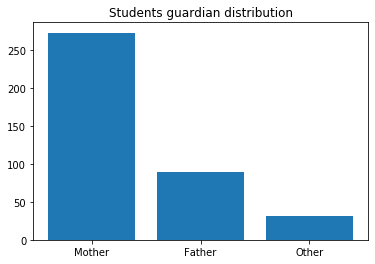

In [23]:
x_guardian = ['Mother','Father', 'Other']
y_guardian =  students_grades[['guardian','G3']].groupby('guardian').count()
y_guardian.columns = ['count']
plt.bar(x_guardian, y_guardian['count'])
plt.title('Students guardian distribution')
plt.show()

En el gráfico anterior es posible observar que los datos se encuentran balanceados.

### 3.1.12. Travel Time

Este atributo corresponde al tiempo que requieren los estudiantes para viajar al centro educativo donde:
* 1 : < 15 min.
* 2 : 15 a 30 min.
* 3 : 30 a 60 min.
* 4 : > 1 hora.

Al estar en valores numericos no es necesario realizar ningún tipo de transformación, pero si se realizará un gráfico de barras con el fin de determinar que los datos se encuetren balanceados.

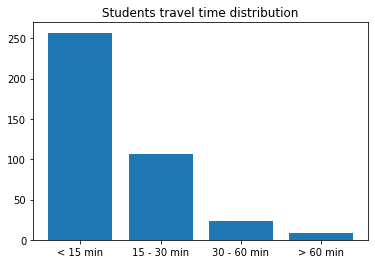

In [24]:
x_traveltime = ['< 15 min','15 - 30 min', '30 - 60 min', '> 60 min']
y_traveltime =  students_grades[['traveltime','G3']].groupby('traveltime').count()
y_traveltime.columns = ['count']
plt.bar(x_traveltime, y_traveltime['count'])
plt.title('Students travel time distribution')
plt.show()

En el gráfico anterior es posible observar que los datos se encuentran balanceados.

### 3.1.13. Study Time

Este atributo indica el tiempo estimado de estudio invertido por el estudiante semanalmente. El mismo se encuentra categorizado de la siguiente manera:

* 1 : < 2 horas
* 2 : 2 a 5 horas
* 3 : 5 a 10 horas
* 4 : > 10 horas

Al estar en valores númericos no es necesario realizar ningún tipo de transformación, pero si se realizará un gráfico de barras con el fin de determinar que los datos se encuetren balanceados.

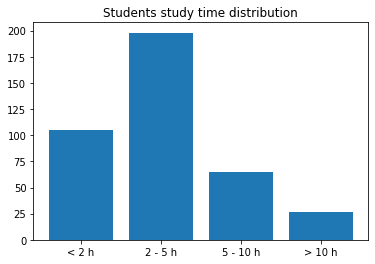

In [25]:
x_studytime = ['< 2 h','2 - 5 h', '5 - 10 h', '> 10 h']
y_studytime =  students_grades[['studytime','G3']].groupby('studytime').count()
y_studytime.columns = ['count']
plt.bar(x_studytime, y_studytime['count'])
plt.title('Students study time distribution')
plt.show()

En el gráfico anterior podemos observar que los datos se encuetran balanceados.

### 3.1.14. Failures

Este atributo indica el número de materias pasadas falladas por el estudiante, es importante mencionar que se asignó un valor de 4 en el caso que se haya fallado 4 o más materias. Al estar los datos en valor númerico no fue necesario realizar ningún tipo de transformación, pero si es necesario realizar un gráfico de barras con el fin de determinar si los datos se encuentran balanceados.

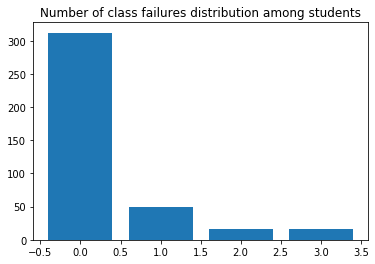

In [26]:
y_failures =  students_grades[['failures','G3']].groupby('failures').count()
y_failures.columns = ['count']
plt.bar(y_failures.index, y_failures['count'])
plt.title('Number of class failures distribution among students')
plt.show()

### 3.1.15. Educational Support

Este atributo indica si el estudiante recibe ayuda educativa de cualquier indole. Los datos para este atributo son del tipo string y corresponden a 'yes' ó 'no'. Razón por la cual los mismos serán transformados a valores binarions donde:

* 0 : No recibe ayuda educativa.
* 1 : Si recibe ayuda educativa.

In [27]:
students_grades.schoolsup.replace(to_replace = "no"  , value = 0, inplace=True)
students_grades.schoolsup.replace(to_replace = "yes" , value = 1, inplace=True)

Se realizá un gráfico de barras con el fin de determinar si los datos se encuentran distribuidos.

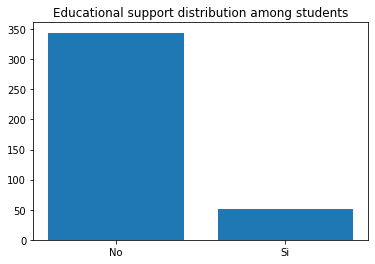

In [28]:
x_schoolsup = ['No','Si']
y_schoolsup =  students_grades[['schoolsup','G3']].groupby('schoolsup').count()
y_schoolsup.columns = ['count']
plt.bar(x_schoolsup, y_schoolsup['count'])
plt.title('Educational support distribution among students')
plt.show()

En el gráfico anterior podemos observar que los datos se encuetran balanceados.

### 3.1.16. Family Educational Support

Este atributo indica si el estudiante recibe ayuda de su familia para la educación, Los datos para este atributo son del tipo string y corresponden a 'yes' ó 'no'. Razón por la cual los mismos serán transformados a valores binarions donde:

* 0 : No recibe ayuda educativa de su familia.
* 1 : Si recibe ayuda educativa de su familia.

In [29]:
students_grades.famsup.replace(to_replace = "no"  , value = 0, inplace=True)
students_grades.famsup.replace(to_replace = "yes" , value = 1, inplace=True)

Se realizá un gráfico de barras con el fin de determinar si los datos se encuentran distribuidos.

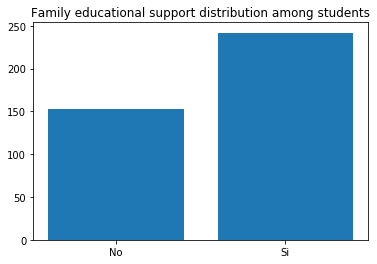

In [30]:
x_famsup = ['No','Si']
y_famsup =  students_grades[['famsup','G3']].groupby('famsup').count()
y_famsup.columns = ['count']
plt.bar(x_famsup, y_famsup['count'])
plt.title('Family educational support distribution among students')
plt.show()

En el gráfico anterior podemos observar que los datos se encuetran balanceados.

### 3.1.7. Extra Paid Classes

Este atributo indica si al estudiante se le pagan clases aparte sobre la materia en cuestión. Este dato corresponde a un string con los valores de 'yes' ó 'no'. Razón por la cual dichos valores serán transformados a datos númericos de la siguiente manera:

* 0 : No se le pagan clases por aparte.
* 1 : Si se le pagan clases por aparte.

In [31]:
students_grades.paid.replace(to_replace = "no"  , value = 0, inplace=True)
students_grades.paid.replace(to_replace = "yes" , value = 1, inplace=True)

Ademas, se realizará un gráfico de barras con el fin de observar si los datos se encuentran balanceados para este atributo.

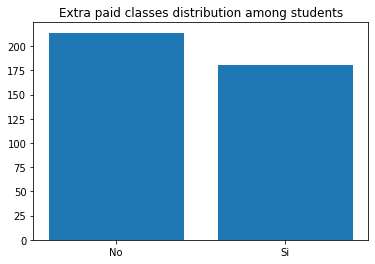

In [32]:
x_paid = ['No','Si']
y_paid =  students_grades[['paid','G3']].groupby('paid').count()
y_paid.columns = ['count']
plt.bar(x_paid, y_paid['count'])
plt.title('Extra paid classes distribution among students')
plt.show()

En el gráfico anterior es posible observar que los datos se encuentran balanceados para este atributo.

### 3.1.8. Activities

Este atributo indica si el estudiante realiza actividades extra curriculares, dicho atributo viene con valores de 'yes' ó 'no'. Razón por la cual es necesario transformarlos a valores númericos de la siguiente manera:

* 0 : No realiza actividades extra curriculares.
* 1 : Si realiza actividades extra curriculares.

In [33]:
students_grades.activities.replace(to_replace = "no"  , value = 0, inplace=True)
students_grades.activities.replace(to_replace = "yes" , value = 1, inplace=True)

Se utiliza un gráfico de barras para determinar si los datos se encuentran balanceados para este atributo.

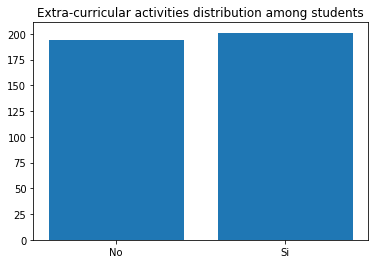

In [34]:
x_activities = ['No','Si']
y_activities =  students_grades[['activities','G3']].groupby('activities').count()
y_activities.columns = ['count']
plt.bar(x_activities, y_activities['count'])
plt.title('Extra-curricular activities distribution among students')
plt.show()

En la gráfica anterior es posible observar que los datos se encuentran balanceados.

### 3.1.19. Nursery

Este atributo indica si el estudiante asistió a un jardín de niños público o no. Los valores para este atributo son strings con  'yes' ó 'no', razón por la cual deben ser transformados a valores númericos donde:

* 0 : No asistió a un jardín de niños público.
* 1 : Si asistió a un jardín de niños público.

In [35]:
students_grades.nursery.replace(to_replace = "no"  , value = 0, inplace=True)
students_grades.nursery.replace(to_replace = "yes" , value = 1, inplace=True)

Al igual que los otros atributos se realiza una gráfica de barras para determinar si los datos se encuentran balanceados o no.

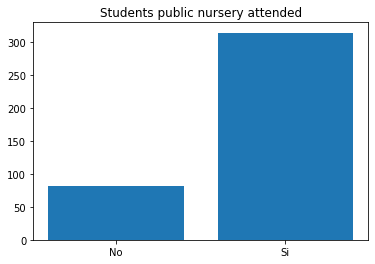

In [36]:
x_nursery = ['No','Si']
y_nursery =  students_grades[['nursery','G3']].groupby('nursery').count()
y_nursery.columns = ['count']
plt.bar(x_nursery, y_nursery['count'])
plt.title('Students public nursery attended')
plt.show()

En el gráfico anterior se puede observar que los datos se encuetran balanceados.

### 3.1.20. Higher

Este atributo indica si los estudiantes desean asistir a la universidad o educiación superior. Este atributo cuenta con datos con valores de 'yes' ó 'no', razón por la cual deben ser transformados a valores númericos donde:

* 0 : No desea asistir a la universidad.
* 1 : Si desea asistir a la universidad.

In [37]:
students_grades.higher.replace(to_replace = "no"  , value = 0, inplace=True)
students_grades.higher.replace(to_replace = "yes" , value = 1, inplace=True)

Se hizo una gráfica de barras para observar el comportamiento de los datos referente a este atributo.

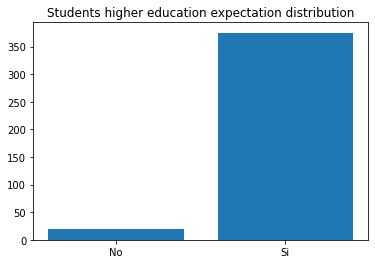

In [38]:
x_higher = ['No','Si']
y_higher =  students_grades[['higher','G3']].groupby('higher').count()
y_higher.columns = ['count']
plt.bar(x_higher, y_higher['count'])
plt.title('Students higher education expectation distribution')
plt.show()

### 3.1.21. Internet

Este atributo indica si los estudiantes cuentan con acceso a internet en casa, los valores para este atributo son strings de 'yes' o 'no', razón por la cual deben ser transformados a valores númericos para poder ser procesados y visualizados de manera que:

* 0 : No cuenta con acceso a internet en casa.
* 1 : Si cuenta con acceso a internet en casa.

In [39]:
students_grades.internet.replace(to_replace = "no"  , value = 0, inplace=True)
students_grades.internet.replace(to_replace = "yes" , value = 1, inplace=True)

También se gráfican estos datos con el fin de observar si se encuentran balanceados o no.

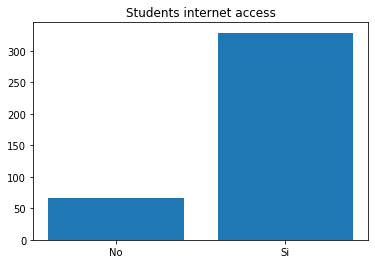

In [40]:
x_internet = ['No','Si']
y_internet =  students_grades[['internet','G3']].groupby('internet').count()
y_internet.columns = ['count']
plt.bar(x_internet, y_internet['count'])
plt.title('Students internet access')
plt.show()

En la gráfica anterior se puede observar que los datos se encuentran balanceados.

### 3.1.22. Romantic

Este atributo corresponde a si el estudiante se encuentran en una relación amorosa o no, los valores para este atributo en el dataset son de 'yes' ó 'no', razón por la cual deben ser transformados a valores númericos donde:

* 0 : No se encuentra en una relación amorosa.
* 1 : Si se encuentra en una relación amorosa.

In [41]:
students_grades.romantic.replace(to_replace = "no"  , value = 0, inplace=True)
students_grades.romantic.replace(to_replace = "yes" , value = 1, inplace=True)

También se realiza un gráfico de barras para este atributo, con el fin de determinar si se encuentra balanceado o no.

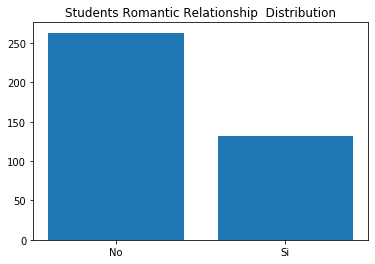

In [42]:
x_romantic = ['No','Si']
y_romantic =  students_grades[['romantic','G3']].groupby('romantic').count()
y_romantic.columns = ['count']
plt.bar(x_romantic, y_romantic['count'])
plt.title('Students Romantic Relationship  Distribution')
plt.show()

En el gráfico anterior se puede observar que los datos se encuentran balanceados.

### 3.1.23. Famrel

Este atributo indica la calidad de relación del estudiante con su familia, los valores se encuentran en el rango de 1 a 5 donde 1 corresponde a una calidad muy mala y 5 a una calidad excelente. Al estar en valores númericos no fue necesaria una transformación de los datos para este atributo. Pero se procede a gráficar los datos con el fin de observar si los mismos se encuetran balanceados.

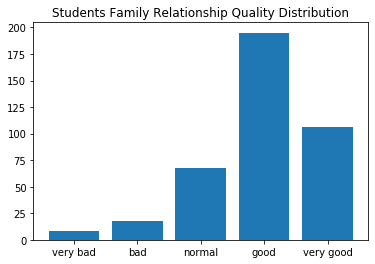

In [43]:
x_famrel = ['very bad', 'bad', 'normal','good', 'very good']
y_famrel =  students_grades[['famrel','G3']].groupby('famrel').count()
y_famrel.columns = ['count']
plt.bar(x_famrel, y_famrel['count'])
plt.title('Students Family Relationship Quality Distribution')
plt.show()

Es posible observar que los datos se encuentran balanceados en el gráfico anterior.

### 3.1.24. Freetime

Este atributo indica la cantidad de tiempo libre del estudiante despues de la escuela, los valores van del rango de 1 a 5, donde 1 corresponde a muy poco, y 5 a muy alto. Dado que los datos son valores númericos no fue necesaria ninguna transformación pero si es necesario graficar estos datos para determinar si se encuentran balanceados o no.

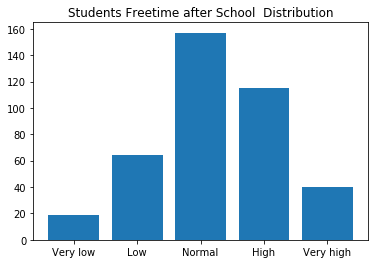

In [44]:
x_freetime = ['Very low','Low', 'Normal', 'High', 'Very high']
y_freetime =  students_grades[['freetime','G3']].groupby('freetime').count()
y_freetime.columns = ['count']
plt.bar(x_freetime, y_freetime['count'])
plt.title('Students Freetime after School  Distribution')
plt.show()

En el gráfico anterior es posible observar que los datos se encuentran balanceados.

### 3.1.25. Goout

Este atributo indica la frecuencia con la que el estudiante sale con sus amigos, los valores se encuentran en el rango de 1 a 5, donde 1 corresponde a que sale muy poco y 5 que sale muy frecuentemente. Para este atributo se gráficaron los datos para observar si los mismos se encuentran balanceados o no.

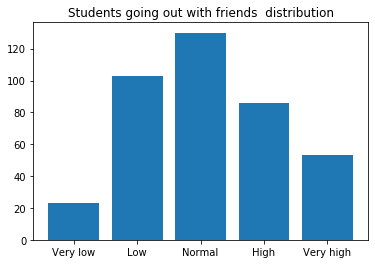

In [45]:
x_goout= ['Very low','Low', 'Normal', 'High', 'Very high']
y_goout =  students_grades[['goout','G3']].groupby('goout').count()
y_goout.columns = ['count']
plt.bar(x_goout, y_goout['count'])
plt.title('Students going out with friends  distribution')
plt.show()

En la gráfica anterior es posible observar que los datos estan balanceados.

### 3.1.25. Dalc

Este atributo indica la frecuencia de consumo de alcohol del estudiante entre semana. Los datos estan en el rango de 1 a 5, donde 1 corresponde a muy poco y 5 corresponde a muy frecuentemente. Se graficó los datos con el fin de determinar si los mismos estan balanceados o no.

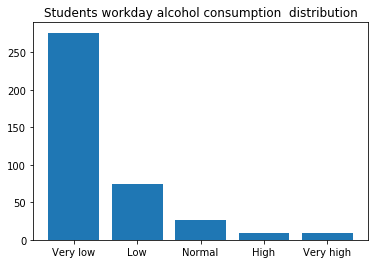

In [46]:
x_dalc= ['Very low','Low', 'Normal', 'High', 'Very high']
y_dalc =  students_grades[['Dalc','G3']].groupby('Dalc').count()
y_dalc.columns = ['count']
plt.bar(x_dalc, y_dalc['count'])
plt.title('Students workday alcohol consumption  distribution')
plt.show()

### 3.1.26. Walc

Este atributo indica la frecuencia de consumo de alcohol del estudiante los fines de semana. Los datos estan en el rango de 1 a 5, donde 1 corresponde a muy poco y 5 corresponde a muy frecuentemente. Se graficó los datos con el fin de determinar si los mismos estan balanceados o no.

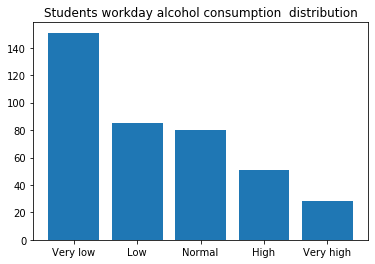

In [47]:
x_walc= ['Very low','Low', 'Normal', 'High', 'Very high']
y_walc =  students_grades[['Walc','G3']].groupby('Walc').count()
y_walc.columns = ['count']
plt.bar(x_walc, y_walc['count'])
plt.title('Students workday alcohol consumption  distribution')
plt.show()

### 3.1.27. Health

Este atributo el estado de salud del estudiante, los valores están en el rango de 1 a 5, donde 1 corresponde a muy mala y 5 a muy buena. Se graficó los datos con el fin de determinar si los mismos estan balanecados o no.

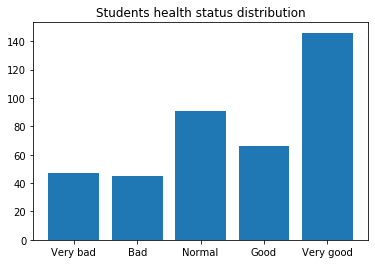

In [48]:
x_health = ['Very bad','Bad', 'Normal', 'Good', 'Very good']
y_health =  students_grades[['health','G3']].groupby('health').count()
y_health.columns = ['count']
plt.bar(x_health, y_health['count'])
plt.title('Students health status distribution')
plt.show()

Es posible observar que los datos se encuentran balanceados para este atributo.

### 3.1.28.  Absences

Este atributo indica la cantidad de ausencias del estudiante, es un valor que va del rango de 0 a 93. Se opto por normalizar dichos valores con el fin de remover cualquier problema a futuro por la escala del mismo.

In [49]:
students_grades['absences'] = normalize([students_grades['absences']])[0]
print(students_grades['absences'])

0      0.030735
1      0.020490
2      0.051226
3      0.010245
4      0.020490
         ...   
390    0.056348
391    0.015368
392    0.015368
393    0.000000
394    0.025613
Name: absences, Length: 395, dtype: float64


### 3.1.29. Final Grade

Este atributo corresponde a la nota final en la materia de matemáticas de los estudiantes. La misma se encuentra en el rango de 0 a 20, se procede a gráficar dichos valores con el fin de observar su distribución.

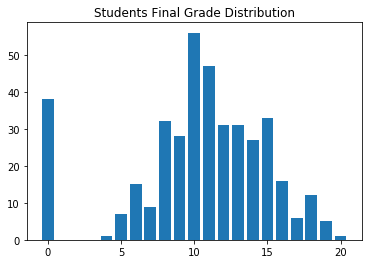

In [50]:
y_fgrade =  students_grades[['G3','sex']].groupby('G3').count()
y_fgrade.columns = ['count']
plt.bar(y_fgrade.index, y_fgrade['count'])
plt.title('Students Final Grade Distribution')
plt.show()

En este caso se van a eliminar los outliers con el fin de obtener una distribución normal. (Utilizaremos un factor de 2 veces la desviación estandar).

In [51]:
elements = nu.array(students_grades['G3'])
mean     = nu.mean(elements,axis=0)
sd       = nu.std(elements,axis=0)
list_of_index_to_delete = []
for row in students_grades.iterrows():
    if (row[1].G3 < (mean - 2 * sd)) or (row[1].G3 > (mean + 2 * sd)) :
        students_grades.drop(row[0], inplace=True)

Luego de eliminar los outliers, se procede a graficar nuevamente.

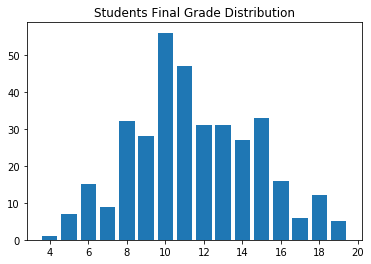

In [52]:
y_fgrade =  students_grades[['G3','sex']].groupby('G3').count()
y_fgrade.columns = ['count']
plt.bar(y_fgrade.index, y_fgrade['count'])
plt.title('Students Final Grade Distribution')
plt.show()

Ahora al observar el gráfico nuevamente es fácil distinguir que el mismo sigue una distribución normal.

## 3.2. Algunas Gráficas

En esta sección se gráfican algunos de los atributos con respecto al desempeño de notas de los estudiantes con el fin de observar su comportamiento. Las gráficas corresponden diagramas de dispersión. 

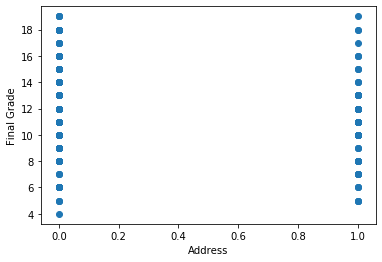

In [53]:
plt.scatter(students_grades['address'], students_grades['G3'])
plt.xlabel('Address')
plt.ylabel('Final Grade')
plt.show()

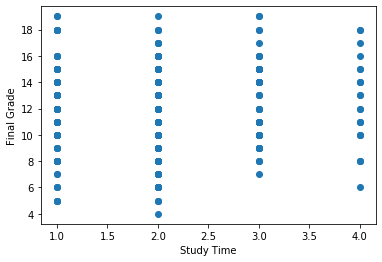

In [54]:
plt.scatter(students_grades['studytime'], students_grades['G3'])
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

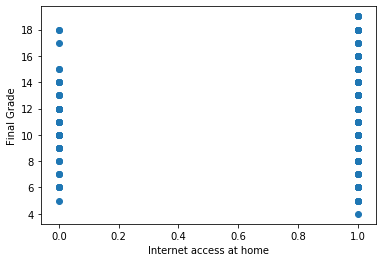

In [55]:
plt.scatter(students_grades['internet'], students_grades['G3'])
plt.xlabel('Internet access at home')
plt.ylabel('Final Grade')
plt.show()

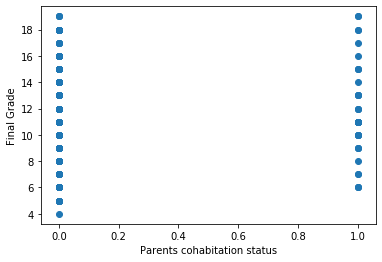

In [56]:
plt.scatter(students_grades['Pstatus'], students_grades['G3'])
plt.xlabel('Parents cohabitation status')
plt.ylabel('Final Grade')
plt.show()

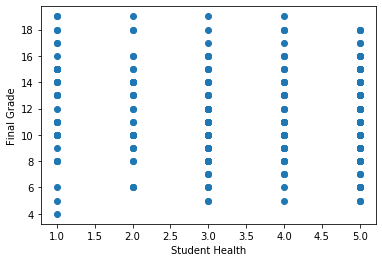

In [57]:
plt.scatter(students_grades['health'], students_grades['G3'])
plt.xlabel('Student Health')
plt.ylabel('Final Grade')
plt.show()